In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston() #import boston housing data

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
#Creating the dataframe for this dataset
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
boston['MEDV'] = boston_dataset.target #set MEDV as target

In [5]:
boston.isnull().sum() #check if there is missing data

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

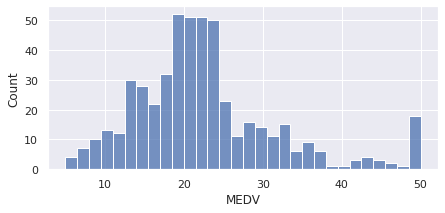

In [6]:
#plot histogram of MEDV values
sns.set(rc={'figure.figsize':(7,3)})
sns.histplot(boston['MEDV'], bins=30)
plt.show()

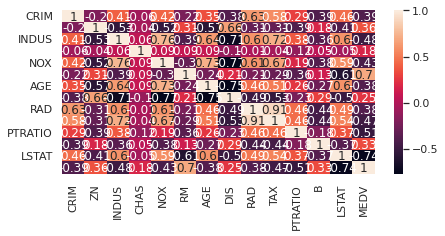

In [7]:
#Plot correlation matrix
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [15]:
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split

#Set dataframe with choosed parameters picked from initial data
X = pd.DataFrame(np.c_[boston['NOX'], boston['RM'], boston['INDUS'], boston['TAX'], boston['LSTAT'], boston['PTRATIO']], columns = ['NOX','RM','INDUS','TAX','LSTAT','PRATIO'])


z = boston['MEDV']


scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

bias = []
variance = []
bias_variance = []
testing_error=[]
training_error =[]
testing_r2=[]
training_r2 =[]

#polynomial order
n = 4

for poly in range (1,n+1): #loop for the polynomial order
    mse_test=[]
    r2_test=[]
    mse_train=[]
    r2_train=[]
    
    #Make folds using SKlearn
    kf = KFold(n_splits=10, random_state=42, shuffle=True)
    kf.get_n_splits(X_scaled)
    
    i = 0
    for train_index, test_index in kf.split(X_scaled):
        #Make train and test data using the folds made by SKlearn
        X_train_scaled, X_test_scaled = X_scaled[train_index], X_scaled[test_index]
        z_train, z_test = z.ravel()[train_index], z.ravel()[test_index]
        
        # Fit training data with a linear regression using SKlearn
        lin_model=make_pipeline(PolynomialFeatures(poly),LinearRegression())
        lin_model.fit(X_train_scaled,z_train)

        # model evaluation for training set
        z_train_predict = lin_model.predict(X_train_scaled)
        mse_train = (np.sqrt(mean_squared_error(z_train, z_train_predict)))
        r2_train = r2_score(z_train, z_train_predict)
        
        # model evaluation for testing set
        z_test_predict = lin_model.predict(X_test_scaled)
        mse_test = (np.sqrt(mean_squared_error(z_test, z_test_predict)))
        r2_test = r2_score(z_test, z_test_predict)
        
        # Increment counter i
        i = i + 1
        
        
    print('Polynomial degree:', poly)
    print("\n")
    print("The model performance for training set")
    print("--------------------------------------")
    training_error.append(np.mean(mse_train))
    print('RMSE is {}'.format(np.mean(mse_train)))
    training_r2.append(np.mean(r2_train))
    print('R2 score is {}'.format(np.mean(r2_train)))
    print("\n")

    print("The model performance for testing set")
    print("--------------------------------------")
    testing_error.append(np.mean(mse_test))
    print('RMSE is {}'.format(np.mean(mse_test)))
    testing_r2.append(np.mean(r2_test))
    print('R2 score is {}'.format(np.mean(r2_test)))
    print("\n")

    variance.append(np.mean(np.var( z_test_predict , axis=0, keepdims=True)))
    bias.append(np.mean( (z_test - np.mean( z_test_predict , axis=0, keepdims=True))**2 ))
    bias_variance.append(variance[poly-1]+bias[poly-1])

<class 'pandas.core.frame.DataFrame'>
Polynomial degree: 1


The model performance for training set
--------------------------------------
RMSE is 5.134783779711608
R2 score is 0.6948337632921128


The model performance for testing set
--------------------------------------
RMSE is 5.692867924876932
R2 score is 0.5116806825197548


Polynomial degree: 2


The model performance for training set
--------------------------------------
RMSE is 3.321546445114773
R2 score is 0.8723053153742056


The model performance for testing set
--------------------------------------
RMSE is 4.722443671340635
R2 score is 0.6639721592519434


Polynomial degree: 3


The model performance for training set
--------------------------------------
RMSE is 2.645669233964278
R2 score is 0.9189854069552287


The model performance for testing set
--------------------------------------
RMSE is 4.332364134950193
R2 score is 0.7171920639839886


Polynomial degree: 4


The model performance for training set
------------

[5.134783779711608, 3.321546445114773, 2.645669233964278, 2.8217426395073986]
[5.692867924876932, 4.722443671340635, 4.332364134950193, 11.488774055171051]


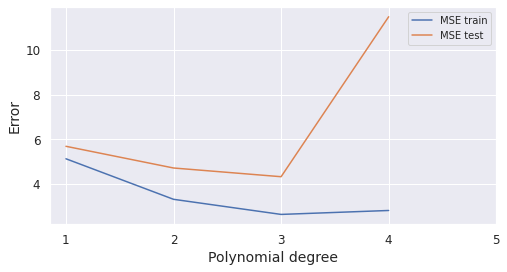

In [9]:
#plot parameters to estimate quality of the fit
plt.figure(figsize=(8,4))
plt.plot(training_error, label="MSE train")
print(training_error)
plt.plot(testing_error, label="MSE test")
print(testing_error)
plt.legend(fontsize = 10)
plt.xticks([0,1,2,3,4],["1","2","3","4","5"], fontsize=12)
plt.xlabel("Polynomial degree", fontsize=14)
plt.ylabel("Error", fontsize = 14)
plt.yticks(fontsize=12)
plt.show()

[0.6948337632921128, 0.8723053153742056, 0.9189854069552287, 0.9078432899023438]
[0.5116806825197548, 0.6639721592519434, 0.7171920639839886, -0.988790630625781]


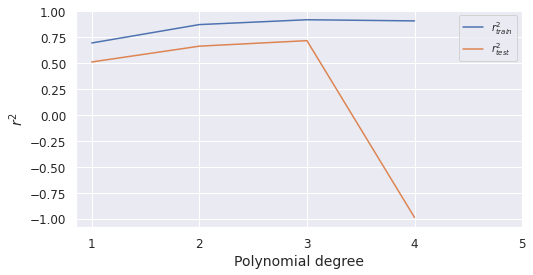

In [10]:

plt.figure(figsize=(8,4))
plt.plot(training_r2, label=r'$r^2_{train}$')
print(training_r2)
plt.plot(testing_r2, label=r'$r^2_{test}$')
print(testing_r2)
plt.legend(fontsize = 10)
plt.xticks([0,1,2,3,4],["1","2","3","4","5"], fontsize=12)
plt.xlabel("Polynomial degree", fontsize=14)
plt.ylabel(r'$r^2$', fontsize = 14)
plt.yticks(fontsize=12)
plt.show()

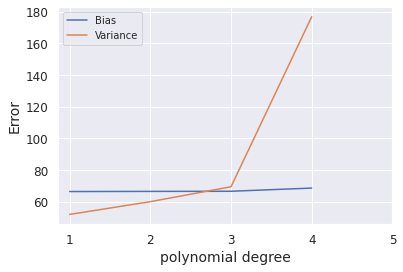

In [11]:
plt.figure(figsize=(6,4))
plt.plot(bias, label="Bias")
plt.plot(variance, label="Variance")
plt.legend(fontsize = 10)
plt.xticks([0,1,2,3,4],["1","2","3","4","5"], fontsize=12)
plt.xlabel("polynomial degree", fontsize=14)
plt.ylabel("Error", fontsize = 14)
plt.yticks(fontsize=12)
plt.show()

[118.29466106696253, 126.44686605736425, 135.94894821655276, 245.34510741577154]
[5.692867924876932, 4.722443671340635, 4.332364134950193, 11.488774055171051]


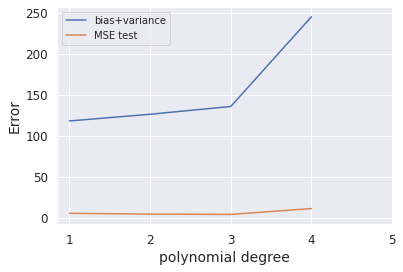

In [12]:
plt.figure(figsize=(6,4))
plt.plot(bias_variance, label="bias+variance")
print(bias_variance)
plt.plot(testing_error, label="MSE test")
print(testing_error)
plt.legend(fontsize = 10)
plt.xticks([0,1,2,3,4],["1","2","3","4","5"], fontsize=12)
plt.xlabel("polynomial degree", fontsize=14)
plt.ylabel("Error", fontsize = 14)
plt.yticks(fontsize=12)
plt.show()

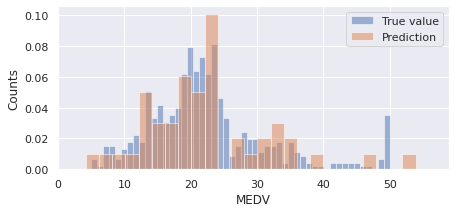

In [14]:
#plot histogram for the result and the data

from matplotlib import pyplot
pyplot.hist(boston['MEDV'], 50, density=True, alpha=0.5, label='True value')
pyplot.hist(z_test_predict, 50, density=True, alpha=0.5, label='Prediction')
plt.xlabel('MEDV')
plt.xlim(0,)
plt.ylabel('Counts')
plt.grid(True)
pyplot.legend(loc='upper right')
plt.show()